In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Check directory

print('현재 작업 경로 :', os.getcwd())
os.chdir('/content/drive/MyDrive')
print('변경된 작업 경로 :', os.getcwd())

현재 작업 경로 : /content
변경된 작업 경로 : /content/drive/MyDrive


In [ ]:
# git clone yolo
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content/drive/MyDrive/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the 

# Data load

In [ ]:
# Data load
data_dir = '/content/drive/MyDrive/House_Detection'
data_yaml = '/content/drive/MyDrive/House_Detection/data.yaml'

In [ ]:
# check Yaml
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['chimney', 'door', 'house', 'roof', 'sun', 'wall', 'window'],
 'nc': 7,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'htp-c98c0',
  'url': 'https://universe.roboflow.com/project/htp-c98c0/dataset/1',
  'version': 1,
  'workspace': 'project'},
 'test': '/content/drive/MyDrive/House_Detection/test/images',
 'train': '/content/drive/MyDrive/House_Detection/train/images',
 'val': '/content/drive/MyDrive/House_Detection/valid/images'}

In [ ]:
# change route (default to mydrive)
film['train'] = '/content/drive/MyDrive/House_Detection/train/images'
film['val'] = '/content/drive/MyDrive/House_Detection/valid/images'
film['test'] = '/content/drive/MyDrive/House_Detection/test/images'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

변경된 yaml 파일 :


{'names': ['chimney', 'door', 'house', 'roof', 'sun', 'wall', 'window'],
 'nc': 7,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'htp-c98c0',
  'url': 'https://universe.roboflow.com/project/htp-c98c0/dataset/1',
  'version': 1,
  'workspace': 'project'},
 'test': '/content/drive/MyDrive/House_Detection/test/images',
 'train': '/content/drive/MyDrive/House_Detection/train/images',
 'val': '/content/drive/MyDrive/House_Detection/valid/images'}

# Train

In [ ]:
!python train.py --img 640 --batch 16 --epochs 150 --data {data_yaml} --weights yolov5s.pt --cache

2023-12-11 10:34:40.532524: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 10:34:40.532574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 10:34:40.532631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/House_Detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SG

# Detect

In [ ]:
# test img route
test_data_dir = film['test']

In [ ]:
!python detect.py --weights runs/train/exp16/weights/best.pt --img 640 --conf 0.6 --source {test_data_dir}

detect: weights=['runs/train/exp16/weights/best.pt'], source=/content/drive/MyDrive/House_Detection/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
FPS: 11.16
image 1/10 /content/drive/MyDrive/House_Detection/test/images/test1.jpg: 640x640 1 doors, , 1 houses, , 1 roofs, , 1 walls, , 1 windows, , 11.5ms
FPS: 74.20
image 2/10 /content/drive/MyDrive/House_Detection/test/images/test10.jpg: 640x640 1 houses, , 1 roofs, , 1 walls, , 11.6ms
FPS: 76

/content/drive/MyDrive/yolov5/runs/detect/exp2/test1.jpg


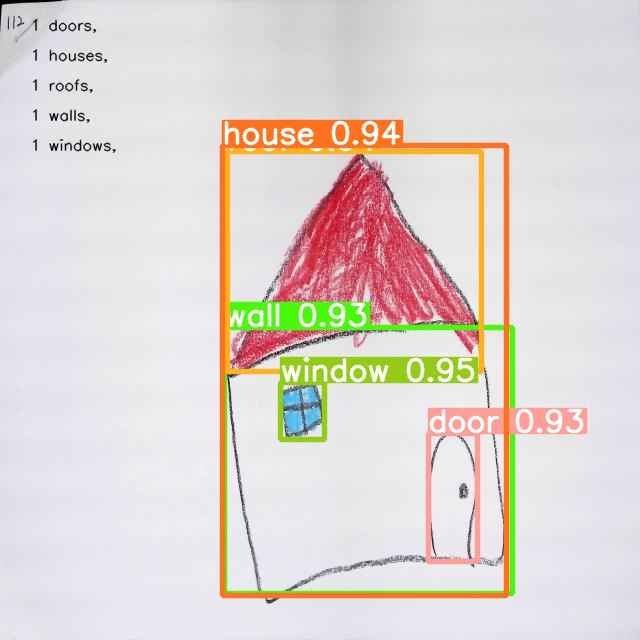



/content/drive/MyDrive/yolov5/runs/detect/exp2/test10.jpg


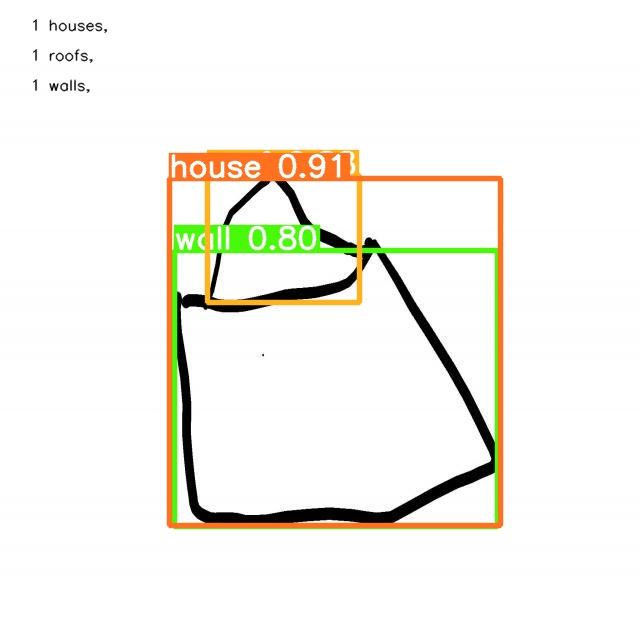



/content/drive/MyDrive/yolov5/runs/detect/exp2/test2.jpg


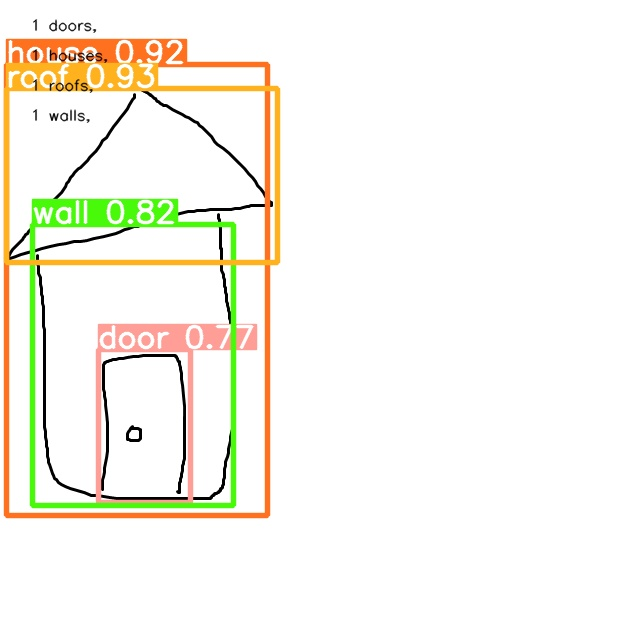



/content/drive/MyDrive/yolov5/runs/detect/exp2/test3.jpg


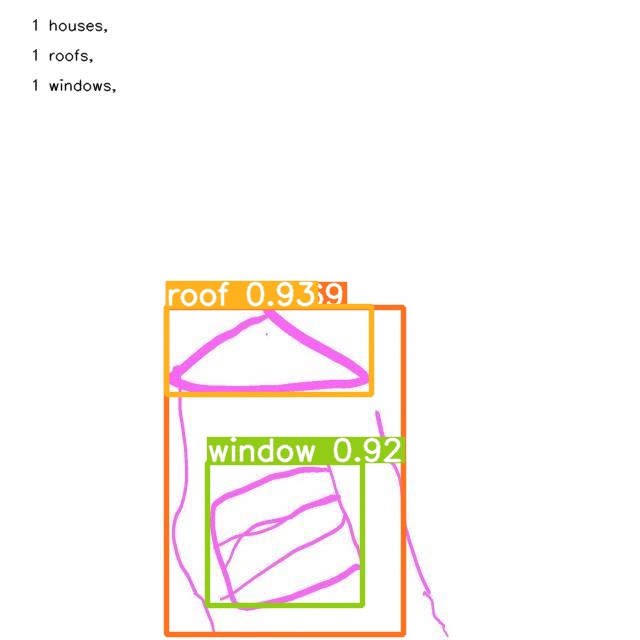



/content/drive/MyDrive/yolov5/runs/detect/exp2/test4.jpg


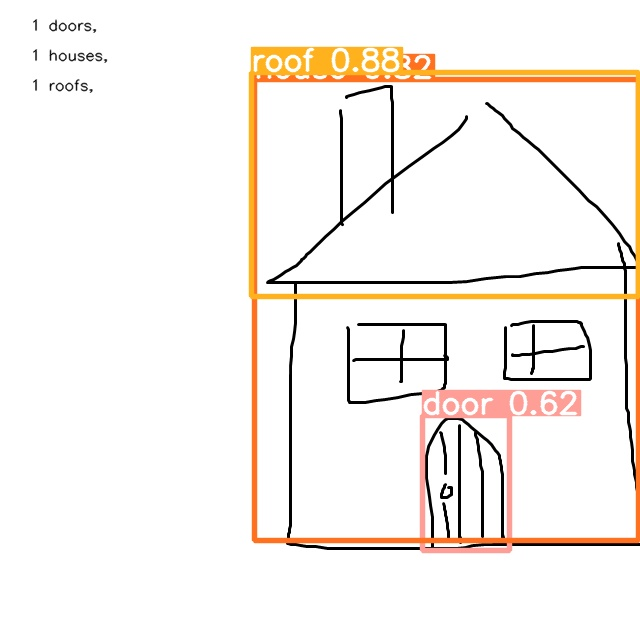



/content/drive/MyDrive/yolov5/runs/detect/exp2/test5.jpg


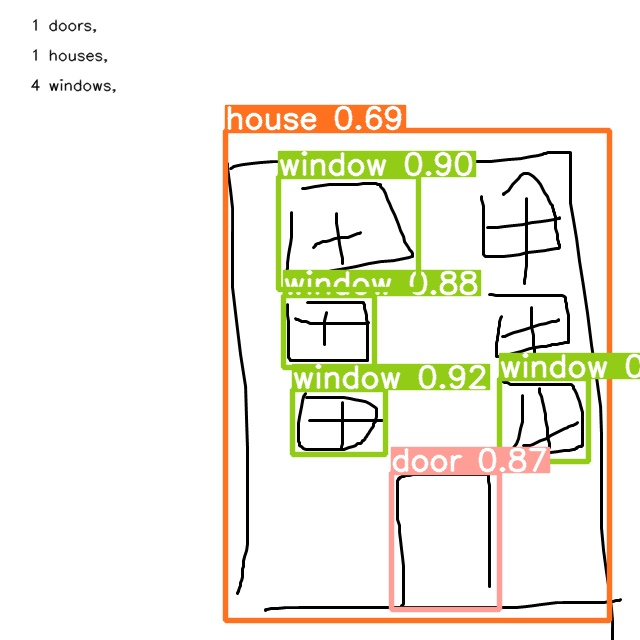



/content/drive/MyDrive/yolov5/runs/detect/exp2/test6.jpg


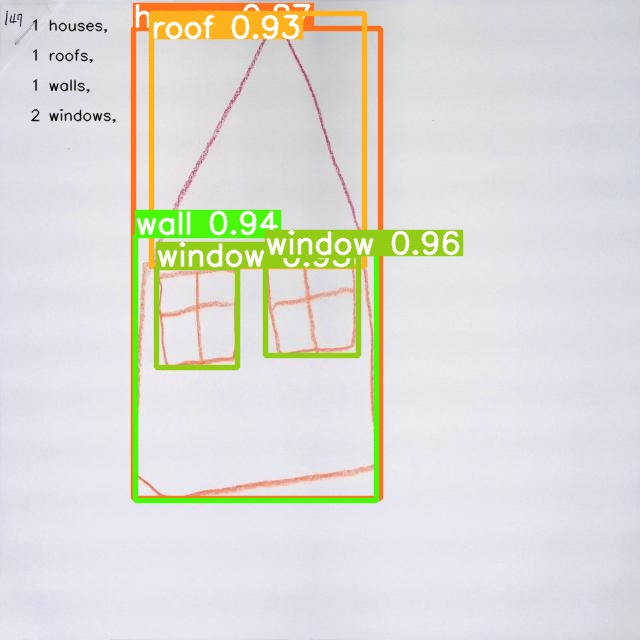



/content/drive/MyDrive/yolov5/runs/detect/exp2/test7.jpg


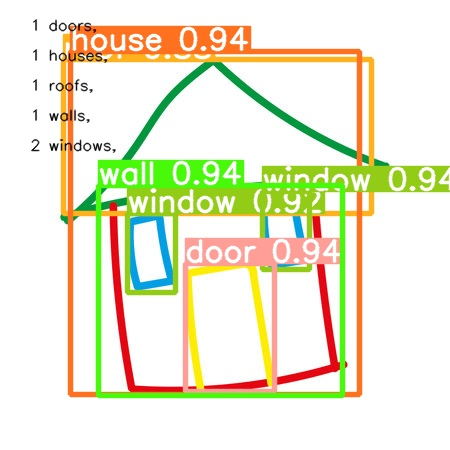



/content/drive/MyDrive/yolov5/runs/detect/exp2/test9.jpg


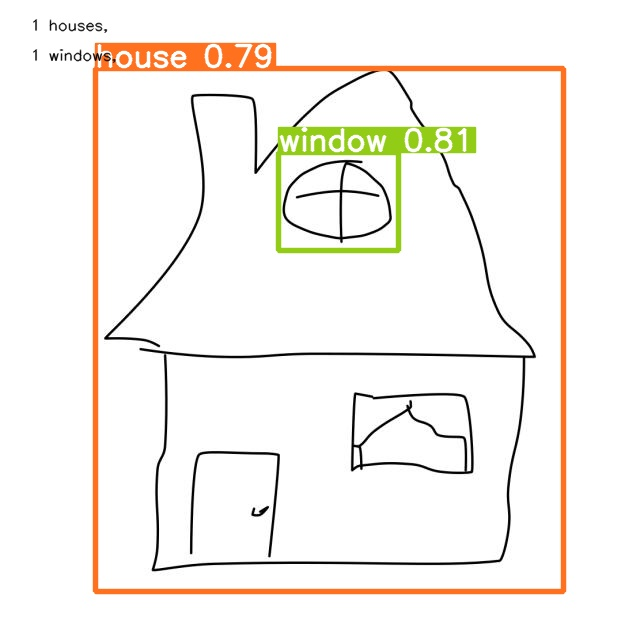

In [ ]:
# check result

import glob
from IPython.display import Image, display

if not os.path.exists('/content/drive/MyDrive/yolov5/runs/detect/exp2' + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/drive/MyDrive/yolov5/runs/detect/exp2' + '/*.jpg'): #assuming JPG
    print(imageName)
    display(Image(filename=imageName))
    print("\n")

# Algorithm for diagnose

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
predictions_df = pd.read_csv('/content/drive/MyDrive/yolov5/runs/detect/exp2/predictions.csv')

In [ ]:
predictions_df.head()

,Image Name,Prediction,Confidence,x1,x2,y1,y2
0,test1.jpg,wall,0.93,224.0,512.0,327.0,593.0
1,test1.jpg,door,0.93,428.0,477.0,433.0,561.0
2,test1.jpg,roof,0.94,227.0,481.0,151.0,371.0
3,test1.jpg,house,0.94,222.0,506.0,145.0,595.0
4,test1.jpg,window,0.95,280.0,324.0,382.0,439.0


In [ ]:
# calculate center coordinates

center_x_coordinate = []
center_y_coordinate = []

for i in range(len(predictions_df)):
  center_x_coordinate.append((predictions_df['x1'][i] + predictions_df['x2'][i])/2)
  center_y_coordinate.append((predictions_df['y1'][i] + predictions_df['y2'][i])/2)


predictions_df['center_x_coordinate'] = center_x_coordinate
predictions_df['center_y_coordinate'] = center_y_coordinate

In [ ]:
# calculate object's width and height
width = []
height = []
area = []

for i in range(len(predictions_df)):
  width.append(predictions_df['x2'][i] - predictions_df['x1'][i])
  height.append(predictions_df['y2'][i] - predictions_df['y1'][i])
  area.append(width[i]*height[i])

predictions_df['width'] = width
predictions_df['height'] = height
predictions_df['area'] = area

In [ ]:
predictions_df.head()

,Image Name,Prediction,Confidence,x1,x2,y1,y2,center_x_coordinate,center_y_coordinate,width,height,area
0,test1.jpg,wall,0.93,224.0,512.0,327.0,593.0,368.0,460.0,288.0,266.0,76608.0
1,test1.jpg,door,0.93,428.0,477.0,433.0,561.0,452.5,497.0,49.0,128.0,6272.0
2,test1.jpg,roof,0.94,227.0,481.0,151.0,371.0,354.0,261.0,254.0,220.0,55880.0
3,test1.jpg,house,0.94,222.0,506.0,145.0,595.0,364.0,370.0,284.0,450.0,127800.0
4,test1.jpg,window,0.95,280.0,324.0,382.0,439.0,302.0,410.5,44.0,57.0,2508.0


In [ ]:
house = predictions_df[predictions_df['Prediction'] == 'house']

In [ ]:
#img 크기가 640 x 640 임
# 그러면 중간값은 320, 320
# 그러면 중간값에서 얼마나 치우치면(임계치) 잘못됐다고 판단할까?
# 크기는 몇 곱하기 몇 이상이 되면 잘못됐다고 판단할까? 만 하면 끝

In [ ]:
house

,Image Name,Prediction,Confidence,x1,x2,y1,y2,center_x_coordinate,center_y_coordinate,width,height,area
3,test1.jpg,house,0.94,222.0,506.0,145.0,595.0,364.0,370.0,284.0,450.0,127800.0
7,test10.jpg,house,0.91,169.0,500.0,178.0,525.0,334.5,351.5,331.0,347.0,114857.0
10,test2.jpg,house,0.92,6.0,267.0,64.0,515.0,136.5,289.5,261.0,451.0,117711.0
12,test3.jpg,house,0.69,166.0,403.0,307.0,634.0,284.5,470.5,237.0,327.0,77499.0
16,test4.jpg,house,0.82,254.0,638.0,79.0,540.0,446.0,309.5,384.0,461.0,177024.0
18,test5.jpg,house,0.69,225.0,609.0,130.0,620.0,417.0,375.0,384.0,490.0,188160.0
24,test6.jpg,house,0.87,133.0,380.0,28.0,498.0,256.5,263.0,247.0,470.0,116090.0
31,test7.jpg,house,0.94,70.0,359.0,51.0,394.0,214.5,222.5,289.0,343.0,99127.0
36,test8.png,house,0.66,294.0,629.0,18.0,236.0,461.5,127.0,335.0,218.0,73030.0
47,test9.jpg,house,0.79,95.0,563.0,68.0,591.0,329.0,329.5,468.0,523.0,244764.0


만약 door 이 0 이라면 1추가 <br>
sun 이 1 이상이라면 1추가 <br>
지붕이 0 이라면 1추가 <br>
굴뚝이 2개 이상이라면 2점 추가 <br>
창문이 0개라면 1점 추가 <br>
창문이 3개이상이라면 2점 추가 <br>

In [ ]:
def score_counter(i):
  score = 0

  if predictions_df[predictions_df['Image Name'] == image_name[i]]['Prediction'].isin(['door']).sum() == 0:
    score += 1

  if predictions_df[predictions_df['Image Name'] == image_name[i]]['Prediction'].isin(['roof']).sum() == 1:
    score += 1

  if predictions_df[predictions_df['Image Name'] == image_name[i]]['Prediction'].isin(['chimney']).sum() >= 2:
    score += 2

  if predictions_df[predictions_df['Image Name'] == image_name[i]]['Prediction'].isin(['window']).sum() == 0:
    score += 1

  elif predictions_df[predictions_df['Image Name'] == image_name[i]]['Prediction'].isin(['window']).sum() >= 3:
    score += 2

  if house[house['Image Name'] == image_name[i]]['center_x_coordinate'].iloc[0] <= 213.0:
    score += 1

  elif house[house['Image Name'] == image_name[i]]['center_x_coordinate'].iloc[0] > 415.0:
    score += 1

  if house[house['Image Name'] == image_name[i]]['area'].iloc[0] <= 136533.3:
    score += 1

  elif house[house['Image Name'] == image_name[i]]['area'].iloc[0] > 273066.6:
    score += 1

  if score >= 4:
    test_result = 'Mental illness'
  else:
    test_result = 'Normal'

  return score, test_result

In [ ]:
image_name = predictions_df['Image Name'].unique()

# Test result

In [ ]:
scores = []
test_results = []

for i in range(len(image_name)):
    a, b = score_counter(i)
    scores.append(a)
    test_results.append(b)

pd.DataFrame({
    'Image Name':image_name,
    'Points': scores,
    'test_result': test_results
})

,Image Name,Points,test_result
0,test1.jpg,2,Normal
1,test10.jpg,4,Mental illness
2,test2.jpg,4,Mental illness
3,test3.jpg,3,Normal
4,test4.jpg,3,Normal
5,test5.jpg,3,Normal
6,test6.jpg,3,Normal
7,test7.jpg,2,Normal
8,test8.png,4,Mental illness
9,test9.jpg,1,Normal
